## Introduction

In this tutorial, we will learn how to use the `pandas`, `seaborn` and `matplotlib.pyplot` packages to manipulate data and present a simple data visualization with the Palmer Penguins data set.

First, we will `import` the packages and read in the data:

In [1]:
import pandas as pd
import numpy as np
# The following packages contain useful plotting tools:
import seaborn as sns
from matplotlib import pyplot as plt
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

A sample of the data has the following format:

In [2]:
penguins.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


## Data Manipulation

For the purpose of this visualization, we will change the species' name to their shortened, informal name. This will make all data visualizations look cleaner (ie. in the legend on our plots, we will have *"Adelie"* rather than *"Adelie Penguin (Pygoscelis adeliae)"*, making it much neater). 

In [3]:
penguins["Species"] = penguins["Species"].replace({"Adelie Penguin (Pygoscelis adeliae)":"Adelie", 
                            "Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap",
                            "Gentoo penguin (Pygoscelis papua)":"Gentoo"})
penguins.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


## Creating A Visualization

For the data visualization, we will be examining how the bill length and bill depth compare against different species of penguins. To do so, we will create a scatterplot using `seaborn` and `matplotlib.pyplot`, as well as creating a line of best fit for each species to show a correlation between Bill Length and Bill Depth. Note that Culmen is another word for the penguin's bill, so to make the visual a bit more readable, we change all instances of "Culmen" to "Bill" in the last line of the following code block. 

[Text(0.5, 1.0, 'Bill Length vs. Bill Depth of Adelie,\n Chinstrap and Gentoo Penguin Species'),
 Text(0.5, 0, 'Bill Length (mm)'),
 Text(0, 0.5, 'Bill Depth (mm)')]

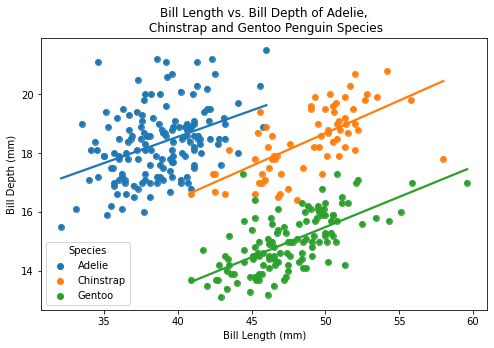

In [4]:
# Set the size of the plot to (x,y),
# where x is width, y is height:
plt.subplots(figsize=(8,5))

# Make the scatterplot with data from the penguins DataFrame,
# using the listed columns as the x, y axes:
# Hue denotes what differentiates the dots, and s is dot size.
sns.scatterplot(data=penguins,
                x = "Culmen Length (mm)", 
                y = "Culmen Depth (mm)", 
                hue = "Species", 
                s = 30)

# Create a best fit line for each species to show a correlation:
# ci=False means to not show a range of certainty in the plot.
# penguins["Species"].unique() gives a list of the (3) unique species.
for species in penguins["Species"].unique():
    sns.regplot(data=penguins[penguins["Species"]== species],
                x = "Culmen Length (mm)", 
                y = "Culmen Depth (mm)",
                ci=False)
    
# Rename the title, xaxis, yaxis respectively:
plt.gca().set(title="Bill Length vs. Bill Depth of Adelie,\n Chinstrap and Gentoo Penguin Species", 
              xlabel="Bill Length (mm)", ylabel = "Bill Depth (mm)")

And there we have it! We now have a simple data visualization showing the correlation between Bill Length and Depth for each of the three penguin species!